# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url and parameters
root = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
search = f'{root}appid={weather_api_key}&units={units}&q='

# Build list containers hold parsed json results from api call
lat=[]
lng=[]
mxtemp=[]
humd=[]
cloud=[]
wndsp=[]
cntry=[]
date=[]
fndcity=[]

# Prime set counter for printing iteration progress
grp = 1

# Loop through call to open weather api and append target values to list containers
for idx, city in enumerate(cities):
    
    # Error handling of missing city value, and printig iteration progress
    try:
        print(f'Processing Record {idx} of Set {grp} | {city}')
        
        response = requests.get(search+city).json()
        lng.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])    
        mxtemp.append(response['main']['temp_max'])  
        humd.append(response['main']['humidity'])  
        cloud.append(response['clouds']['all'])  
        wndsp.append(response['wind']['speed'])  
        cntry.append(response['sys']['country'])  
        date.append(response['dt'])
        fndcity.append(response['name'])
    
    # Error handling continued and increment set counter
    except (KeyError, IndexError):
        print('City not found. Skipping...')
        grp=grp+1
    
    

Processing Record 0 of Set 1 | codrington
Processing Record 1 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 2 of Set 2 | nikolskoye
Processing Record 3 of Set 2 | jennings
Processing Record 4 of Set 2 | quelimane
Processing Record 5 of Set 2 | karwar
Processing Record 6 of Set 2 | marana
Processing Record 7 of Set 2 | ushuaia
Processing Record 8 of Set 2 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 3 | ahipara
Processing Record 10 of Set 3 | yellowknife
Processing Record 11 of Set 3 | dibaya
City not found. Skipping...
Processing Record 12 of Set 4 | kasongo-lunda
Processing Record 13 of Set 4 | cape town
Processing Record 14 of Set 4 | roma
Processing Record 15 of Set 4 | mar del plata
Processing Record 16 of Set 4 | kodiak
Processing Record 17 of Set 4 | riwaka
Processing Record 18 of Set 4 | marzuq
Processing Record 19 of Set 4 | vaini
Processing Record 20 of Set 4 | libreville
Processing Record 21 of Set 4 | cidreira
Processing Record 

City not found. Skipping...
Processing Record 184 of Set 17 | carahue
Processing Record 185 of Set 17 | san patricio
Processing Record 186 of Set 17 | buta
Processing Record 187 of Set 17 | gus-zheleznyy
Processing Record 188 of Set 17 | port hedland
Processing Record 189 of Set 17 | chuy
Processing Record 190 of Set 17 | ngunguru
Processing Record 191 of Set 17 | calama
Processing Record 192 of Set 17 | nacala
Processing Record 193 of Set 17 | muros
Processing Record 194 of Set 17 | mahadday weyne
City not found. Skipping...
Processing Record 195 of Set 18 | gat
Processing Record 196 of Set 18 | tura
Processing Record 197 of Set 18 | zhigansk
Processing Record 198 of Set 18 | foz do iguacu
Processing Record 199 of Set 18 | hornepayne
Processing Record 200 of Set 18 | umm lajj
Processing Record 201 of Set 18 | castro
Processing Record 202 of Set 18 | batagay
Processing Record 203 of Set 18 | flinders
Processing Record 204 of Set 18 | ankang
Processing Record 205 of Set 18 | notse
Proce

Processing Record 363 of Set 32 | oniceni
Processing Record 364 of Set 32 | nizhnevartovsk
Processing Record 365 of Set 32 | porto velho
Processing Record 366 of Set 32 | bagdarin
Processing Record 367 of Set 32 | san-pedro
Processing Record 368 of Set 32 | karratha
Processing Record 369 of Set 32 | pacific grove
Processing Record 370 of Set 32 | saint anthony
Processing Record 371 of Set 32 | mananjary
Processing Record 372 of Set 32 | margate
Processing Record 373 of Set 32 | puerto carreno
Processing Record 374 of Set 32 | bengkulu
Processing Record 375 of Set 32 | skjervoy
Processing Record 376 of Set 32 | midland
Processing Record 377 of Set 32 | matadi
Processing Record 378 of Set 32 | karpogory
Processing Record 379 of Set 32 | gizo
Processing Record 380 of Set 32 | cognac
Processing Record 381 of Set 32 | luganville
Processing Record 382 of Set 32 | okhotsk
Processing Record 383 of Set 32 | north platte
Processing Record 384 of Set 32 | constitucion
Processing Record 385 of Set

Processing Record 545 of Set 47 | riyadh
Processing Record 546 of Set 47 | oneonta
Processing Record 547 of Set 47 | bereda
Processing Record 548 of Set 47 | filingue
Processing Record 549 of Set 47 | turukhansk
Processing Record 550 of Set 47 | grande prairie
Processing Record 551 of Set 47 | manggar
Processing Record 552 of Set 47 | qinhuangdao
Processing Record 553 of Set 47 | bubaque
Processing Record 554 of Set 47 | poronaysk
Processing Record 555 of Set 47 | prince albert
Processing Record 556 of Set 47 | acapulco
Processing Record 557 of Set 47 | luwuk
Processing Record 558 of Set 47 | fort-shevchenko
Processing Record 559 of Set 47 | kumylzhenskaya
Processing Record 560 of Set 47 | gamba
Processing Record 561 of Set 47 | port macquarie
Processing Record 562 of Set 47 | west bay
Processing Record 563 of Set 47 | guapore
Processing Record 564 of Set 47 | caravelas
Processing Record 565 of Set 47 | santa cruz
Processing Record 566 of Set 47 | tommot
Processing Record 567 of Set 47

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Build dictionary of lists with clean column headers
weather_dict={
    'City':fndcity,'Lat':lat, 'Lng':lng,
    'Max Temp':mxtemp,'Humidity':humd,'Cloudiness':cloud,
    'Wind Speed':wndsp, 'Country':cntry, 'Date':date
}

# Convert dictionary of lists to dataframe object
weather_df = pd.DataFrame(weather_dict)

# Save dataframe as a csv value with stripped index for easier intake in future projects
weather_df.to_csv(output_data_file,index=False)

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Codrington,-38.2667,141.9667,60.44,90,98,12.35,AU,1611597202
1,Nikolskoye,59.7035,30.7861,37.99,93,90,6.71,RU,1611597202
2,Jennings,38.7192,-90.2604,37.00,87,90,17.27,US,1611597202
3,Quelimane,-17.8786,36.8883,77.00,94,40,3.44,MZ,1611597203
4,Karwar,14.8000,74.1333,75.02,72,3,6.02,IN,1611597014


In [5]:
# Check those stats
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.898319,14.024507,50.740639,72.460036,52.309059,8.517780,1.611597e+09
std,33.833233,89.811052,34.210168,20.237375,38.583187,6.244944,6.287869e+01
min,-54.800000,-175.200000,-55.280000,7.000000,0.000000,0.110000,1.611597e+09
25%,-8.124000,-65.641050,30.875000,62.000000,11.000000,3.830000,1.611597e+09
50%,22.890900,18.501200,62.600000,78.000000,58.000000,6.910000,1.611597e+09
75%,49.250800,83.191650,78.165000,87.000000,90.000000,11.500000,1.611597e+09
max,78.218600,178.416700,107.980000,100.000000,100.000000,34.580000,1.611597e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Find all rows with humidity erroneously showing up greater than 100%
hum_count = weather_df[weather_df['Humidity']>100].count()
hum_count

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

In [7]:
#  Get the indices of cities that have humidity over 100%.
hum_index = weather_df[weather_df['Humidity']>100].index
hum_index

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(hum_index, inplace=False)

In [9]:
# Check those stats
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.898319,14.024507,50.740639,72.460036,52.309059,8.517780,1.611597e+09
std,33.833233,89.811052,34.210168,20.237375,38.583187,6.244944,6.287869e+01
min,-54.800000,-175.200000,-55.280000,7.000000,0.000000,0.110000,1.611597e+09
25%,-8.124000,-65.641050,30.875000,62.000000,11.000000,3.830000,1.611597e+09
50%,22.890900,18.501200,62.600000,78.000000,58.000000,6.910000,1.611597e+09
75%,49.250800,83.191650,78.165000,87.000000,90.000000,11.500000,1.611597e+09
max,78.218600,178.416700,107.980000,100.000000,100.000000,34.580000,1.611597e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

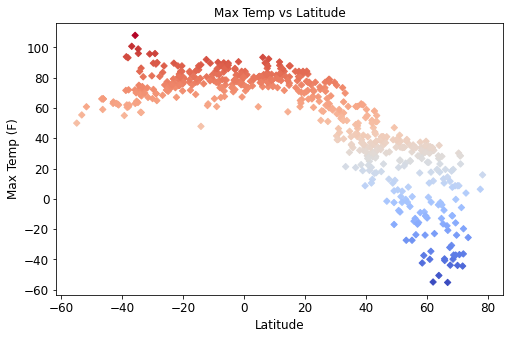

In [10]:
# Using pandas plot temperature vs. latitude, save as png in output_data folder
clean_city_data.plot.scatter('Lat',"Max Temp", c='Max Temp',title='Max Temp vs Latitude',
                             colormap='coolwarm',marker='D',figsize=(8,5), fontsize=12,colorbar=False)

plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Max Temp (F)',fontsize=12)
plt.savefig('output_data/lat_temp.png')

>Warmer temperatures at negative latitudes indicate that it is currently summer in the sourthern hemisphere.

## Latitude vs. Humidity Plot

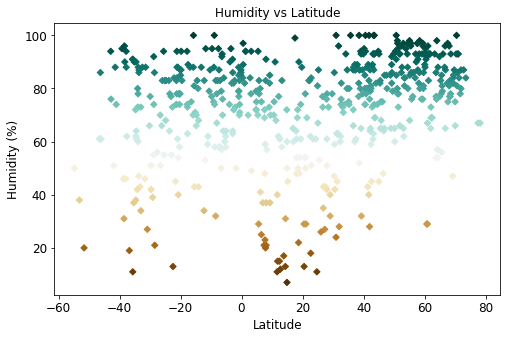

In [11]:
# Using pandas plot humidity vs latitude, save as png in output_data folder
clean_city_data.plot.scatter('Lat',"Humidity", c='Humidity',title='Humidity vs Latitude',
                             colormap='BrBG',marker='D',figsize=(8,5), fontsize=12,colorbar=False)

plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Humidity (%)',fontsize=12)
plt.savefig('output_data/lat_humd.png')

>Overall Earth is a relatively moist planet, with a few dry spots shouldering the equator.

## Latitude vs. Cloudiness Plot

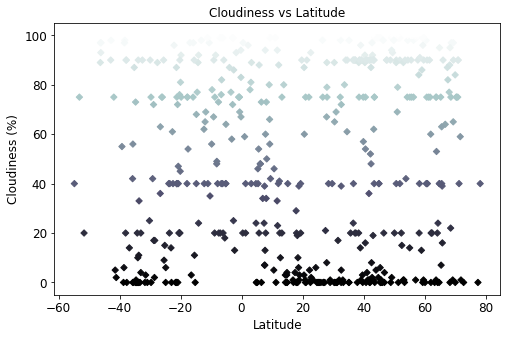

In [12]:
# Using pandas plot cloudiness vs. latitude, save as png in output_data folder
clean_city_data.plot.scatter('Lat',"Cloudiness", c='Cloudiness',title='Cloudiness vs Latitude',
                             colormap='bone',marker='D',figsize=(8,5), fontsize=12,colorbar=False)

plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Cloudiness (%)',fontsize=12)
plt.savefig('output_data/lat_cloud.png')

>Cloudiness appears to be relatively evenly distributed versus latitude. Perhaps just slightly cloudier in the Northern Hemisphere currently during winter.

## Latitude vs. Wind Speed Plot

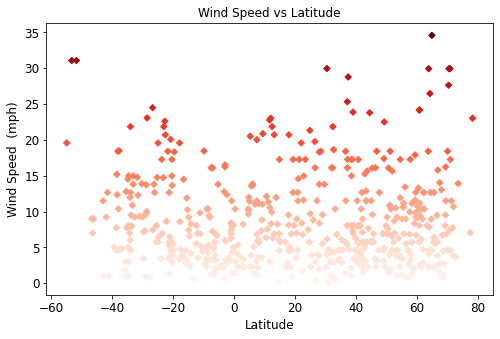

In [13]:
# Using pandas plot wind speed vs. latitude, save as png in output_data folder
clean_city_data.plot.scatter('Lat',"Wind Speed", c='Wind Speed',title='Wind Speed vs Latitude',
                             colormap='Reds',marker='D',figsize=(8,5), fontsize=12,colorbar=False)

plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Wind Speed  (mph)',fontsize=12)
plt.savefig('output_data/lat_wind.png')

>Very slight increase in windspeed in the Northern Hemisphere during the winter months. 

## Linear Regression

In [14]:
# Prepare dataframes for northern and southern hemispheres
north_df = clean_city_data[clean_city_data['Lat']>0]
south_df = clean_city_data[clean_city_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

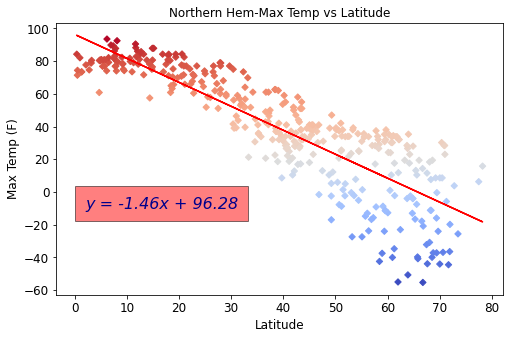

In [15]:
# Using pandas plot max temperature vs latitude for the northern hemisphere
north_df.plot.scatter('Lat',"Max Temp", c='Max Temp',title='Northern Hem-Max Temp vs Latitude',
                             colormap='coolwarm',marker='D',figsize=(8,5), fontsize=12,colorbar=False)
# Set plot labels
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Max Temp (F)',fontsize=12)

# Assign lingress output to each output parameter as a variable
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'], north_df['Max Temp'])

# Calculate target values for regression line 
regress_values = north_df['Lat'] * slope + intercept

# Assign regression equation to string object to print onto plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line over scatter data
plt.plot(north_df['Lat'],regress_values,'-r')

# Print regression equation to plot
plt.text(2,-10,line_eq,fontsize=16,color="darkblue",style='oblique',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Save the figure for later use
plt.savefig('output_data/reg_norlat_temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

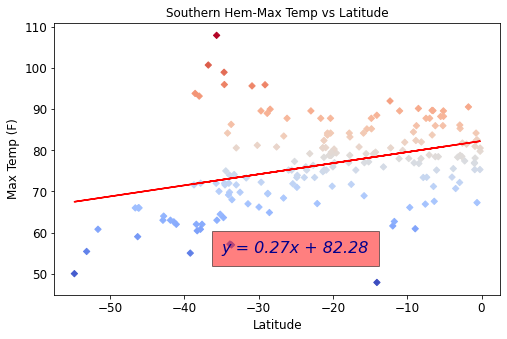

In [16]:
# Using pandas plot max temperature vs latitude for the southern hemisphere
south_df.plot.scatter('Lat',"Max Temp", c='Max Temp',title='Southern Hem-Max Temp vs Latitude',
                             colormap='coolwarm',marker='D',figsize=(8,5), fontsize=12,colorbar=False)
# Set plot labels
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Max Temp (F)',fontsize=12)
# Assign lingress output to each output parameter as a variable
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'], south_df['Max Temp'])

# Calculate target values for regression line 
regress_values = south_df['Lat'] * slope + intercept

# Assign regression equation to string object to print onto plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line over scatter data
plt.plot(south_df['Lat'],regress_values,"r-")

# Print regression equation to plot
plt.text(-35,55,line_eq,fontsize=16,color="darkblue",style='oblique',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Save plot for future use
plt.savefig('output_data/reg_sudlat_temp.png')

>Regression analysis of temperature vs latitude by northern/southern hemisphere indicate that the further away from the equator the cooler the temperature. Temperatures while traveling north get colder quicker due to seasonal influence.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

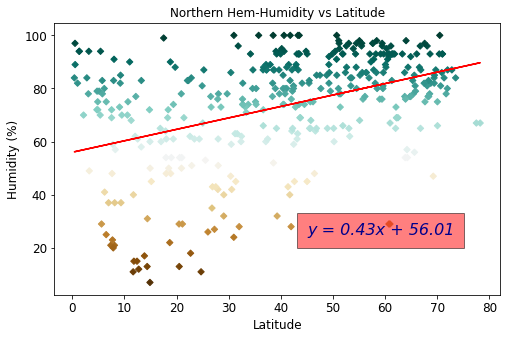

In [17]:
# Using pandas plot max humidity vs latitude for the northern hemisphere
north_df.plot.scatter('Lat',"Humidity", c='Humidity',title='Northern Hem-Humidity vs Latitude',
                             colormap='BrBG',marker='D',figsize=(8,5), fontsize=12,colorbar=False)
# Set plot labels
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Humidity (%)',fontsize=12)

# Assign lingress output to each output parameter as a variable
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'], north_df['Humidity'])

# Calculate target values for regression line 
regress_values = north_df['Lat'] * slope + intercept

# Assign regression equation to string object to print onto plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line on scatter data
plt.plot(north_df['Lat'],regress_values,'-r')

# Print regression equation to plot
plt.text(45,25,line_eq,fontsize=16,color="darkblue",style='oblique',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Save plot for future use
plt.savefig('output_data/reg_norlat_humd.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

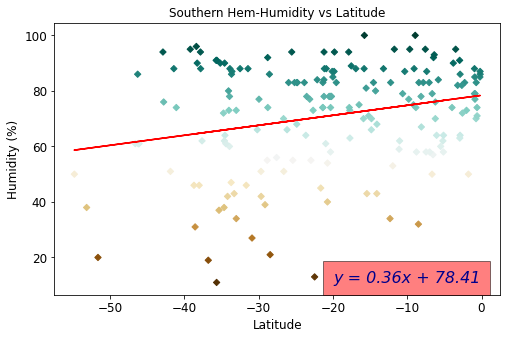

In [18]:
# Using pandas plot humidity vs latitude for the southern hemisphere
south_df.plot.scatter('Lat',"Humidity", c='Humidity',title='Southern Hem-Humidity vs Latitude',
                             colormap='BrBG',marker='D',figsize=(8,5), fontsize=12,colorbar=False)

# Set plot labels
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Humidity (%)',fontsize=12)

# Assign lingress output to each output parameter as a variable
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'], south_df['Humidity'])

# Calculate target values for regression line 
regress_values = south_df['Lat'] * slope + intercept

# Assign regression equation to string object to print onto plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line over scatter data
plt.plot(south_df['Lat'],regress_values,"r-")

# Print regression equation to plot
plt.text(-20,11,line_eq,fontsize=16,color="darkblue",style='oblique',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Save plot for future use
plt.savefig('output_data/reg_sudlat_humd.png')

>Definitive bands of 'dryness' appear in both hemispheres. While the nothern hemisphere gains moisture content at increasing latitude, the southern hemisphere becomes more arid as you progress away from the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

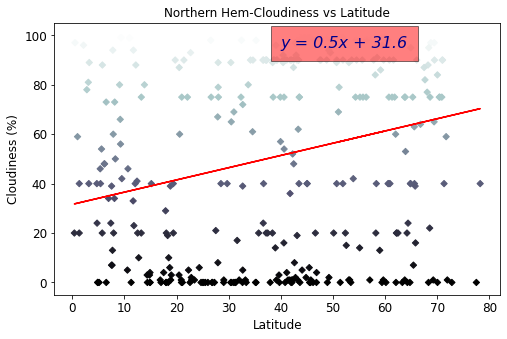

In [19]:
# Using pandas plot max cloudiness vs latitude for the northern hemisphere
north_df.plot.scatter('Lat',"Cloudiness", c='Cloudiness',title='Northern Hem-Cloudiness vs Latitude',
                             colormap='bone',marker='D',figsize=(8,5), fontsize=12,colorbar=False)
# Set plot labels
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Cloudiness (%)',fontsize=12)

# Assign lingress output to each output parameter as a variable
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'], north_df['Cloudiness'])

# Calculate target values for regression line 
regress_values = north_df['Lat'] * slope + intercept

# Assign regression equation to string object to print onto plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line over scatter data
plt.plot(north_df['Lat'],regress_values,'-r')

# Print regression equation to plot
plt.text(40,95,line_eq,fontsize=16,color="darkblue",style='oblique',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Save figure for future use
plt.savefig('output_data/reg_norlat_cloud.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

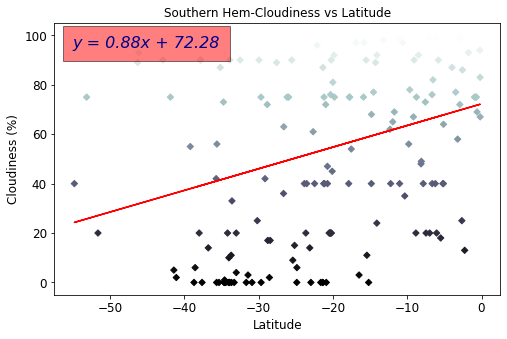

In [20]:
# Using pandas plot cloudiness vs latitude for the southern hemisphere
south_df.plot.scatter('Lat',"Cloudiness", c='Cloudiness',title='Southern Hem-Cloudiness vs Latitude',
                             colormap='bone',marker='D',figsize=(8,5), fontsize=12,colorbar=False)
# Set plot labels
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Cloudiness (%)',fontsize=12)
# Assign lingress output to each output parameter as a variable
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'], south_df['Cloudiness'])

# Calculate target values for regression line 
regress_values = south_df['Lat'] * slope + intercept

# Assign regression equation to string object to print onto plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line over scatter data
plt.plot(south_df['Lat'],regress_values,"r-")

# Print regression equation on plot
plt.text(-55,95,line_eq,fontsize=16,color="darkblue",style='oblique',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Save plot for future use
plt.savefig('output_data/reg_sudlat_cloud.png')

>While the data shows fairly even distribution overall, cloud cover increase from south pole to north pole. Perhaps as an effect of seasonal influence or perhaps more data is needed in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

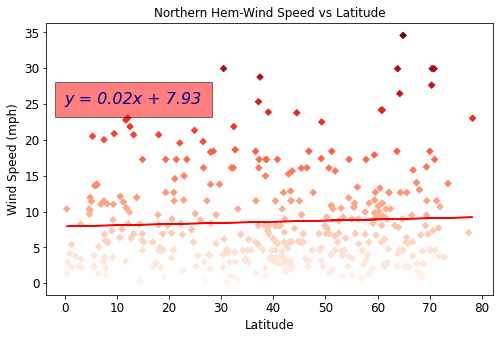

In [21]:
# Using pandas plot wind speed vs latitude for the northern hemisphere
north_df.plot.scatter('Lat',"Wind Speed", c='Wind Speed',title='Northern Hem-Wind Speed vs Latitude',
                             colormap='Reds',marker='D',figsize=(8,5), fontsize=12,colorbar=False)
# Set plot labels
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Wind Speed (mph)',fontsize=12)

# Assign lingress output to each output parameter as a variable
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'], north_df['Wind Speed'])

# Calculate target values for regression line 
regress_values = north_df['Lat'] * slope + intercept

# Assign regression equation to string object to print onto plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line over scatter data
plt.plot(north_df['Lat'],regress_values,'-r')

# Print regression equation on plot
plt.text(0,25,line_eq,fontsize=16,color="darkblue",style='oblique',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Save plot for future use
plt.savefig('output_data/reg_norlat_wind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

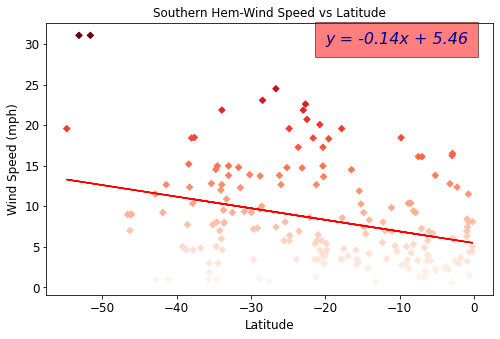

In [22]:
# Using pandas plot wind speed vs latitude for the souther hemisphere
south_df.plot.scatter('Lat',"Wind Speed", c='Wind Speed',title='Southern Hem-Wind Speed vs Latitude',
                             colormap='Reds',marker='D',figsize=(8,5), fontsize=12,colorbar=False)
# Set plot labels
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Wind Speed (mph)',fontsize=12)
# Assign lingress output to each output parameter as a variable
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'], south_df['Wind Speed'])

# Calculate target values for regression line 
regress_values = south_df['Lat'] * slope + intercept

# Assign regression equation to string object to print onto plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line over scatter data
plt.plot(south_df['Lat'],regress_values,"r-")

# Print regression equation on plot
plt.text(-20,30,line_eq,fontsize=16,color="darkblue",style='oblique',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Save plot for future use
plt.savefig('output_data/reg_sudlat_wind.png')

>Windspeed very evenly distributed in the northern hemisphere with little to no change latitudinally. Wind speeds in the southern hemisphere increase mildly from equator to south pole. 